# Don't Be Evil Project - Data Exploration

# Introduction

loading...





Link list for aerticles about trolls:

https://www.linkedin.com/pulse/why-internet-comments-so-toxic-kiera-tsenti/
> If you want to feel shit about the state of the world and everyone in it, Facebook comments are a great place to start.
> I recently saw a mob on LinkedIn make fun of someone for using the word 'nuance'. This was fascinating, because it suggested that the concept of thinking in shades of grey has become so unfamiliar, we've started to reject the language associated with it.

https://www.civilized.life/articles/states-ranked-by-toxic-internet-comments/

https://www.theguardian.com/science/brain-flapping/2014/sep/12/comment-sections-toxic-moderation
> It sits there like an ugly growth beneath articles, bloated and throbbing with vitriol. It groans as hatred expands its force, waiting for any point of dissent to break it – to unleash its full fury on targets who dare convey some measure of civility or dissent (if you want almost guaranteed hate, be a woman).

https://www.nytimes.com/2018/08/08/technology/personaltech/internet-trolls-comments.html
> Ms. Papacharissi said that in her 20 years of researching and interviewing people about online behavior, one conclusion has remained consistent: people use the internet to get more of what they do not get enough of in everyday life.So while people have been socialized to resist being impulsive in the real world, on the internet they cave to their temptations to lash out.

>It’s up to the content providers and tech platforms to vet their communities and set rules and standards for civilized discussion.

> That is an area where many resource-strained news publications fall short: They often leave their comments sections unmoderated, so they become cesspools of toxic behavior. It is also an area where tech companies like Facebook and Twitter struggle, because they have long portrayed themselves as neutral platforms that do not that do not wish to take on the editorial roles of traditional publishers.

https://www.wired.com/2017/08/internet-troll-map/
> INTERNET RULE #1: Never read the comments.

# What kind of data are we dealing with?

The primary data for the competition is, in each provided file, the comment_text column. 
This contains the text of a comment which has been classified as toxic or non-toxic (0...1 in the toxic column). 
The train set’s comments are entirely in english and come either from Civil Comments or Wikipedia talk page edits. 
The test data's comment_text columns are composed of multiple non-English languages.

The *-train.csv files* and validation.csv file also contain a toxic column that is the target to be trained on.

The jigsaw-toxic-comment-train.csv and jigsaw-unintended-bias-train.csv contain training data (comment_text and toxic) from the two previous Jigsaw competitions, as well as additional columns that you may find useful.

*-seqlen128.csv files* contain training, validation, and test data that has been processed for input into BERT.

**What is BERT?**

**Bidirectional Encoder Representations from Transformers (BERT)** is a technique for NLP (Natural Language Processing) pre-training developed by Google. BERT was created and published in 2018 by Jacob Devlin and his colleagues from Google. Google is leveraging BERT to better understand user searches.

The original English-language BERT model used two corpora in pre-training: BookCorpus and English Wikipedia.

# Meta Data

| Variable | Definition                                 | Key                                            | Type        |
|:----------|:--------------------------------------------|:------------------------------------------------|-------------|
|comment_text|
|toxic|
|severe_toxicity|
|obscene|
|identity_attack|
|insult|
|threat|
|asian|
|atheist|
|bisexual|
|black|
|buddhist|
|christian|
|female|
|heterosexual|
|hindu|
|homosexual_gay_or_lesbian|
|intellectual_or_learning_disability|
|jewish| 
|latino| 
|male|
|muslim|
|other_disability|
|other_gender|
|other_race_or_ethnicity|
|other_religion|
|other_sexual_orientation|
|physical_disability|
|psychiatric_or_mental_illness|
|transgender| 
|white|
|created_date|
|rating| 
|funny| 
|wow| 
|sad|
|likes|
|disagree|
|sexual_explicit|
|identity_annotator_count|
|toxicity_annotator_count|

# Exploratory Data Analysis

Exploratory data analysis is a critical phase in the data science process. We will take a thorough look through the data to discover patterns in the data, form hypotheses, and gather insights. Additionally, I am going to display key information in a visually appealing graphs for better understanding. 

1. first: Data Cleaning
    + dealing with missing values


2. Some ideas I want to explore in the EDA phase:

    + short intro to the data set 
    + the proportion of toxic and non-toxic comments 
    + correlation of development with different features 
    + the most targeted group (combination of features)55
    + plotting toxicity over time 
    
    + doing word clouds


3. feature engineering
    + splitting time and date 
    + reformatting time and date 
    + maybe reducing it 
    
    
4. Predictive Modelling: Classification toxic/non-toxic
    + baseline model
    + pipeline
    + gridsearch


5. the fancy stuff
    + using Google's *Perspective*
    + comparing toxicity of recent hashtags 
    + comparing toxicity between 2019 and 2020
    + creating an app to analyse individual content (https://github.com/conversationai/perspectiveapi/wiki/perspective-hacks)
    + webscrape for timeline of toxicity with https://github.com/conversationai/perspective-hacks/blob/master/toxicity_timeline/README.md

In [74]:
#workflow and statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#for showing missing values
import missingno as msno

#visualisation
import seaborn as sns

# Import packages that help us to create document-term matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#natural language processing toolkit
import nltk
import string
from nltk.corpus import stopwords  # removes useless words
from nltk.stem.lancaster import LancasterStemmer  #converts the words to base form; aggressive

#create a wordcloud of often used words
import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

Import the dataset and get a first overview: 

In [3]:
data = pd.read_csv('jigsaw-multilingual-toxic-comment-classification/jigsaw-toxic-comment-train.csv')

In [4]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223549 entries, 0 to 223548
Data columns (total 8 columns):
id               223549 non-null object
comment_text     223549 non-null object
toxic            223549 non-null int64
severe_toxic     223549 non-null int64
obscene          223549 non-null int64
threat           223549 non-null int64
insult           223549 non-null int64
identity_hate    223549 non-null int64
dtypes: int64(6), object(2)
memory usage: 13.6+ MB


In [34]:
np.transpose(data.describe())

,count,mean,std,min,25%,50%,75%,max
toxic,223549.0,0.095657,0.294121,0.0,0.0,0.0,0.0,1.0
severe_toxic,223549.0,0.008777,0.093272,0.0,0.0,0.0,0.0,1.0
obscene,223549.0,0.054306,0.226621,0.0,0.0,0.0,0.0,1.0
threat,223549.0,0.003082,0.055431,0.0,0.0,0.0,0.0,1.0
insult,223549.0,0.050566,0.219110,0.0,0.0,0.0,0.0,1.0
identity_hate,223549.0,0.009470,0.096852,0.0,0.0,0.0,0.0,1.0


In [8]:
data1 = pd.read_csv('jigsaw-multilingual-toxic-comment-classification/jigsaw-unintended-bias-train.csv')

In [9]:
data1.head()

,id,comment_text,toxic,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,"This is so cool. It's like, 'would you want yo...",0.000000,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,Thank you!! This would make my life a lot less...,0.000000,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,This is such an urgent design problem; kudos t...,0.000000,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,Is this something I'll be able to install on m...,0.000000,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,haha you guys are a bunch of losers.,0.893617,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47


The above data is the extended dataset with all the features of the comments like toxicity, annotator rating, etc. 

In [21]:
data1.columns

Index(['comment_text', 'toxic', 'severe_toxicity', 'obscene',
       'identity_attack', 'insult', 'threat', 'asian', 'atheist', 'bisexual',
       'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white', 'created_date',
       'rating', 'funny', 'wow', 'sad', 'likes', 'disagree', 'sexual_explicit',
       'identity_annotator_count', 'toxicity_annotator_count'],
      dtype='object')

In [22]:
data1.shape

(1902194, 41)

The dataset has 1902194 data points and 48 features.

In [23]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1902194 entries, 0 to 1902193
Data columns (total 41 columns):
comment_text                           object
toxic                                  float64
severe_toxicity                        float64
obscene                                float64
identity_attack                        float64
insult                                 float64
threat                                 float64
asian                                  float64
atheist                                float64
bisexual                               float64
black                                  float64
buddhist                               float64
christian                              float64
female                                 float64
heterosexual                           float64
hindu                                  float64
homosexual_gay_or_lesbian              float64
intellectual_or_learning_disability    float64
jewish                                 flo

comment_text, created_date, rating are not numerical.

In [31]:
np.transpose(data1.describe())

,count,mean,std,min,25%,50%,75%,max
toxic,1902194.0,0.103007,0.197081,0.0,0.0,0.0,0.166667,1.00
severe_toxicity,1902194.0,0.004586,0.022869,0.0,0.0,0.0,0.000000,1.00
obscene,1902194.0,0.013885,0.064660,0.0,0.0,0.0,0.000000,1.00
identity_attack,1902194.0,0.022596,0.078634,0.0,0.0,0.0,0.000000,1.00
insult,1902194.0,0.081172,0.176099,0.0,0.0,0.0,0.090909,1.00
threat,1902194.0,0.009298,0.049395,0.0,0.0,0.0,0.000000,1.00
asian,426707.0,0.011905,0.086914,0.0,0.0,0.0,0.000000,1.00
atheist,426707.0,0.003362,0.051648,0.0,0.0,0.0,0.000000,1.00
bisexual,426707.0,0.001897,0.026259,0.0,0.0,0.0,0.000000,1.00
black,426707.0,0.034306,0.167674,0.0,0.0,0.0,0.000000,1.00


Check for missing values in the data:

In [24]:
data1.isnull().sum()

comment_text                                 0
toxic                                        0
severe_toxicity                              0
obscene                                      0
identity_attack                              0
insult                                       0
threat                                       0
asian                                  1475487
atheist                                1475487
bisexual                               1475487
black                                  1475487
buddhist                               1475487
christian                              1475487
female                                 1475487
heterosexual                           1475487
hindu                                  1475487
homosexual_gay_or_lesbian              1475487
intellectual_or_learning_disability    1475487
jewish                                 1475487
latino                                 1475487
male                                   1475487
muslim       

Visualize missing data:

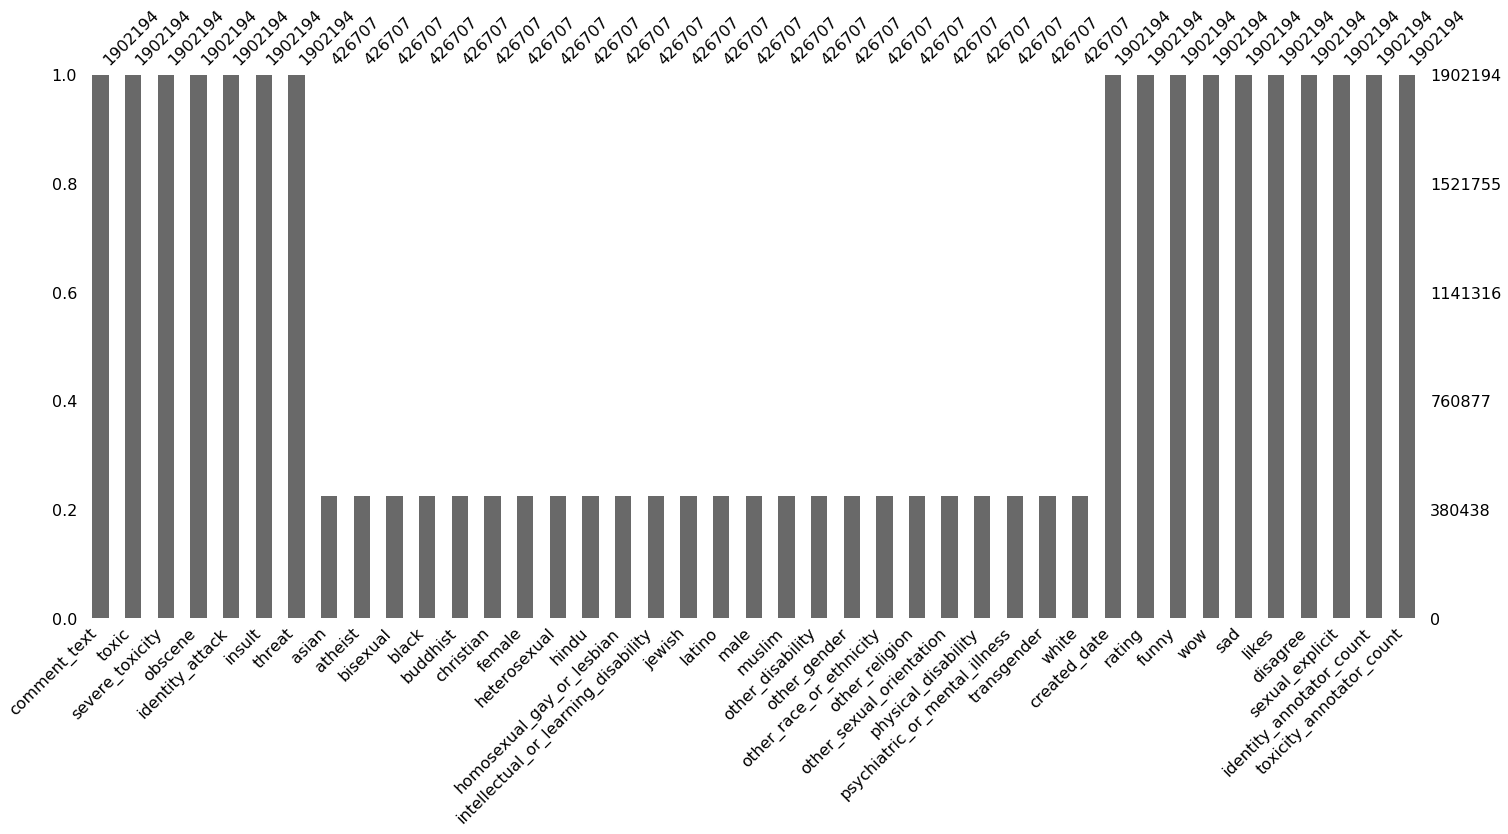

In [29]:
msno.bar(data1) 

What do we see in the bar chart above?

   + There is an equal amount of missing values in all of the identitiy features.

This may indicate that the type of identity hate has been evaluated only later on. However, it is more likely that two datasets have been joined. 

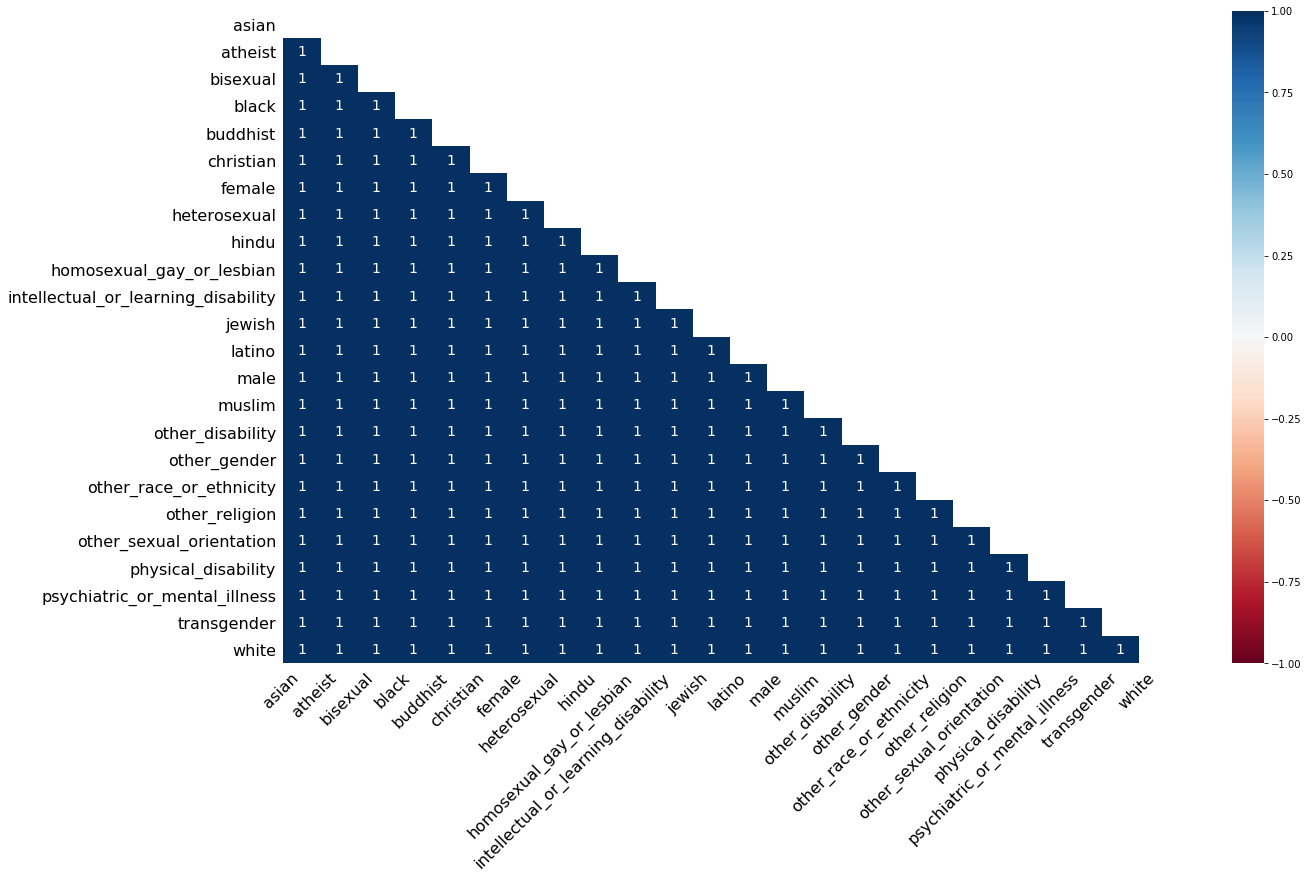

In [27]:
msno.heatmap(data1);

The perfect value of 1 in the *missing values heatmap* confirms that if one identity feature is present the other identity features are also present, suggesting that they have been added at the same time. This is a systematic error, so just going with the 'complete cases analysis' and reducing the sample to complete cases won't do. This ignorance might reduce analysis precision significantly. And that's surely not what we want.

*Multiple Imputation Method*

To deal with the missing data I am suggesting the method of *multiple imputation*.
The method of the imputation should be "*to inject the correct degree of randomness into the imputations and to incorporate that uncertainty when computing standard errors and confidence intervals for parameters of interest.*“ (Royston 2004: 228)

**Data Visualization**

In [48]:
#sns.pairplot(data1);

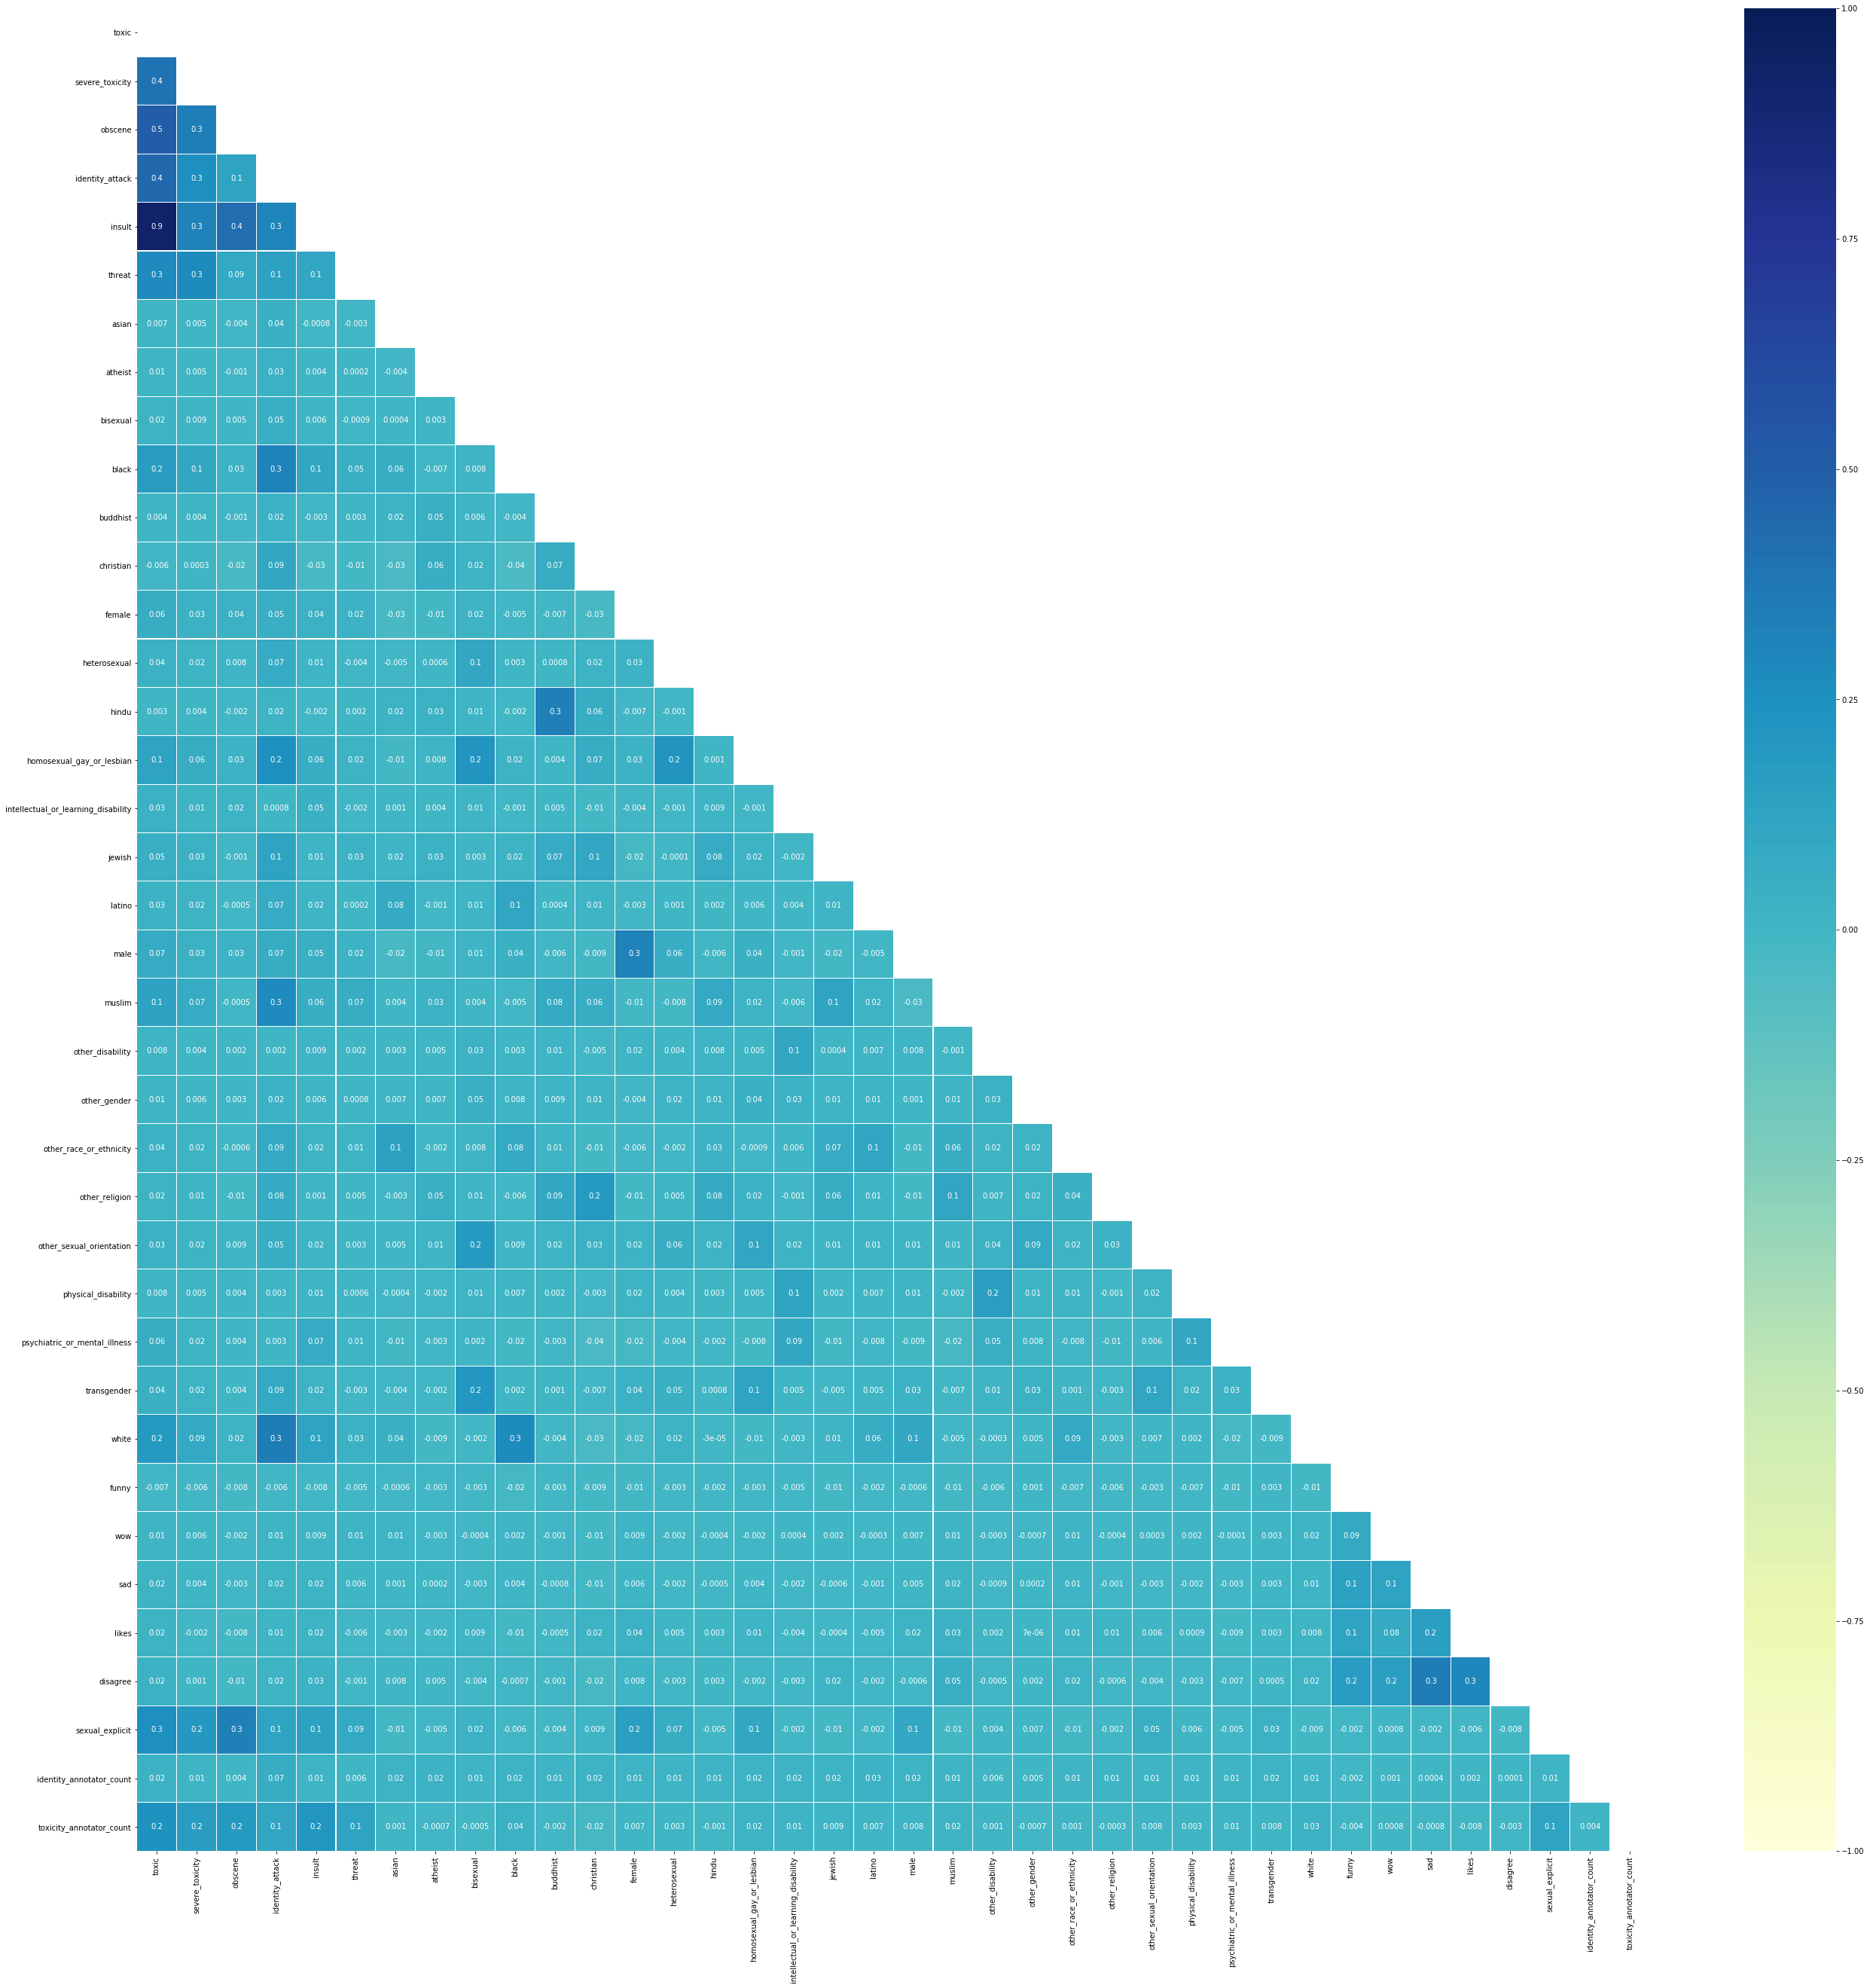

In [49]:
#create a correlation heatmap of all features
matrix = np.triu(data1.corr())
plt.subplots(figsize=(45,45))
sns.heatmap(data1.corr(),
           mask=matrix,
           annot = True,
           fmt = '.1g',
           vmin=-1, 
           vmax=1, 
           center= 0,
           cmap= 'YlGnBu',
           linewidth=.1
           );

In [ ]:
#boxplots


According to the headmap above toxicity correlates very high (90%) with insults. 
Sexual explicit language is seemingly used more (20%) against women. 
And identity_attacks correlate higher with (20%) with muslims. 

Disagreement correlates higher with other social media rating options like funny, wow, sad, likes.

**Extract example comments from dataset**

Let's take a look on what the comments we are working with look like and read some of them. 
Please be aware, that they might use vulgar and obscene language.


In [35]:
data1.head(1)

,comment_text,toxic,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,...,created_date,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,"This is so cool. It's like, 'would you want yo...",0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,2015-09-29 10:50:41.987077+00,rejected,0,0,0,0,0,0.0,0,4


In [36]:
print("A toxic comment from the data:")
print(data1[data1.toxic==1].iloc[10,0])

A toxic comment from the data:
"A life sentence for the offenses against Malheur is too harsh."

Alan:  I've seen nothing in any other news reports about these charges that would indicate that a life sentence is possible.  I believe that this Associates Press news report is thus in error on this point. In fact, other news reports that I have read have indicated that this other charge ( using or carrying a firearm during a crime of violence ) has a 5 year mandatory minimum sentence ( much like the Arson charge the Hammonds were convicted of ), and a 10 year maximum. The Justice Department has determined that the seizure of the refuge was legally a violent act, despite the fact that no one was hurt.

I would expect a 5 year sentence on this charge, just like the Hammonds got. That is probably all that they will get.  And no less, due to the mandatory 5 yr sentence requirement.

So don't worry about a life sentence.  That comment was probably just more sensationalism by the press. Or a du

In [37]:
print("A severe toxic comment from the data:")
print(data1[data1.severe_toxicity>=0.5].iloc[4,0])

A severe toxic comment from the data:
Sure you will find your peace.  Blow yourself up, get 72 virgins; you won't care where you're buried. Just be sure to kill innocent women and children, like a good and true muslim, for extra special afterlife accommodation.


In [38]:
print("An example comment including threat:")
print(data[data.threat==1].iloc[6,1])

An example comment including threat:
SHUT UP, YOU FAT POOP, OR I WILL KICK YOUR ASS!!!


In [39]:
print("Obscene:")
print(data[data.obscene==1].iloc[34,1])

Obscene:
"

 You Suck 

If you don't undelete the page ""Barry Dejay"" I will %$#@ you!"


In [40]:
print("identity_hate:")
print(data[data.identity_hate==1].iloc[10,1])

identity_hate:
Fuck you faggot, I don't care if i get blocked, as long as everyone knows you are a dumb cunt.


As you can see in these example, we are dealing with some very harsh content. There is one way or another to deal with such trolls, but if you want to support a healthy online culture you have to take this phenomenon seriously. Simply ignoring them, won't do. 

In [41]:
#Create a new subset of the data by only taking the 2nd column onwards (comments and categories)
data_count=data1.iloc[:,1:6].sum()

In [42]:
data_count

toxic              195938.969043
severe_toxicity      8722.569474
obscene             26412.272845
identity_attack     42981.435129
insult             154405.399588
dtype: float64

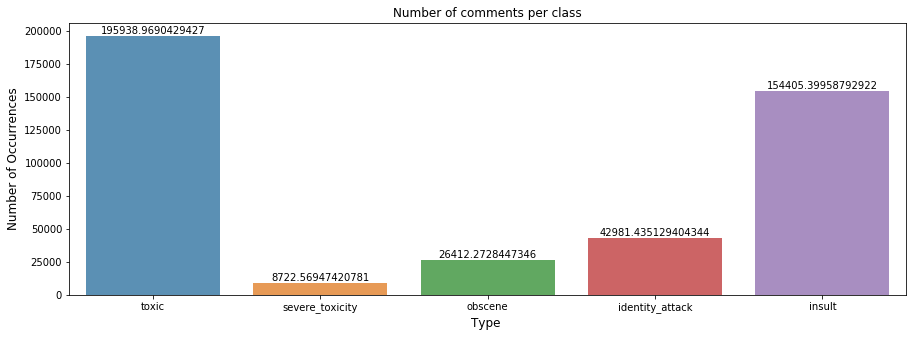

In [43]:
# Plot a chart with the following size
plt.figure(figsize=(15,5))

# Plot a bar chart using the index (category values) and the count of each category. alpha = 0.8 to make the bars more translucent
ax = sns.barplot(data_count.index, data_count.values, alpha=0.8)

plt.title("Number of comments per class")
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)

#adding the text labels for each bar
rects = ax.patches
labels = data_count.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [44]:
num_rows = len(data)
print(num_rows)

223549


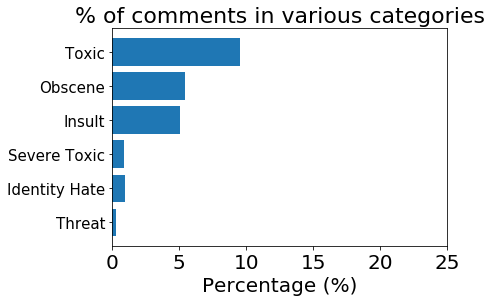

In [45]:
# Create a bar graph 
sum_tox = data['toxic'].sum() / num_rows * 100
sum_sev = data['severe_toxic'].sum() / num_rows * 100
sum_obs = data['obscene'].sum() / num_rows * 100
sum_thr = data['threat'].sum() / num_rows * 100
sum_ins = data['insult'].sum() / num_rows * 100
sum_ide = data['identity_hate'].sum() / num_rows * 100

# Initiate a list of 6 values that represent the 6 x-axis values for the categories
ind = np.arange(6)

# Let the ind variable be the x-axis, whereas the % of toxicity for each category be the y-axis.
# Sequence of % have been sorted manually. This method cannot be done if there are large numbers of categories.
ax = plt.barh(ind, [sum_tox, sum_obs, sum_ins, sum_sev, sum_ide, sum_thr])
plt.xlabel('Percentage (%)', size=20)
plt.xticks(np.arange(0, 30, 5), size=20)
plt.title('% of comments in various categories', size=22)
plt.yticks(ind, ('Toxic', 'Obscene', 'Insult', 'Severe Toxic', 'Identity Hate', 'Threat', ), size=15)

# Invert the graph so that it is in descending order.
plt.gca().invert_yaxis()
plt.show()

**Creading Word Clouds**

In [95]:
def wordcloud(df, label):
    
    # Print only rows where the toxic category label value is 1 (ie. the comment is toxic)
    subset=df[df[label]==1]
    text=subset.comment_text.values
    wc= WordCloud(background_color="white",max_words=3000)

    wc.generate(" ".join(text))

    plt.figure(figsize=(40,40))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

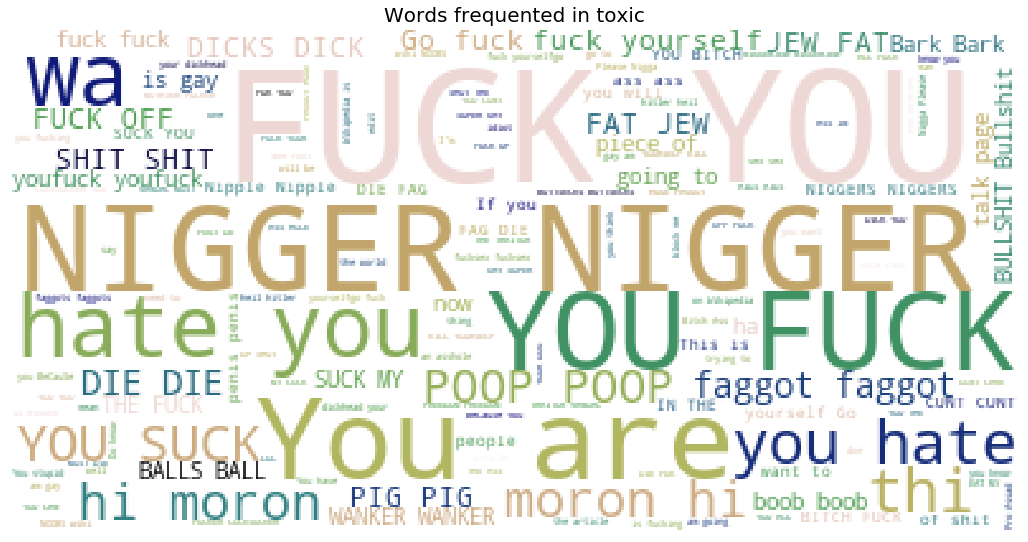

In [96]:
wordcloud(data, 'toxic')

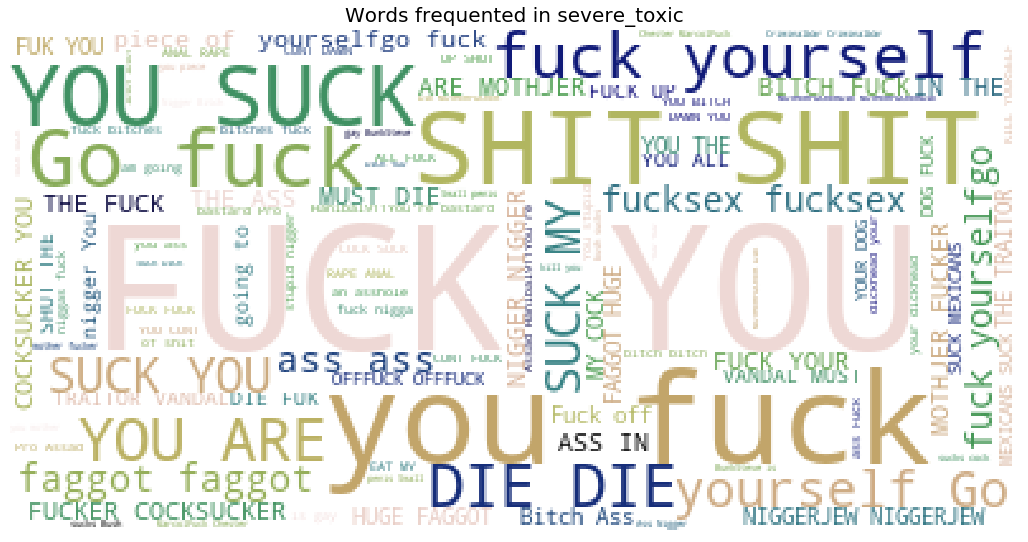

In [91]:
wordcloud(data, 'severe_toxic')

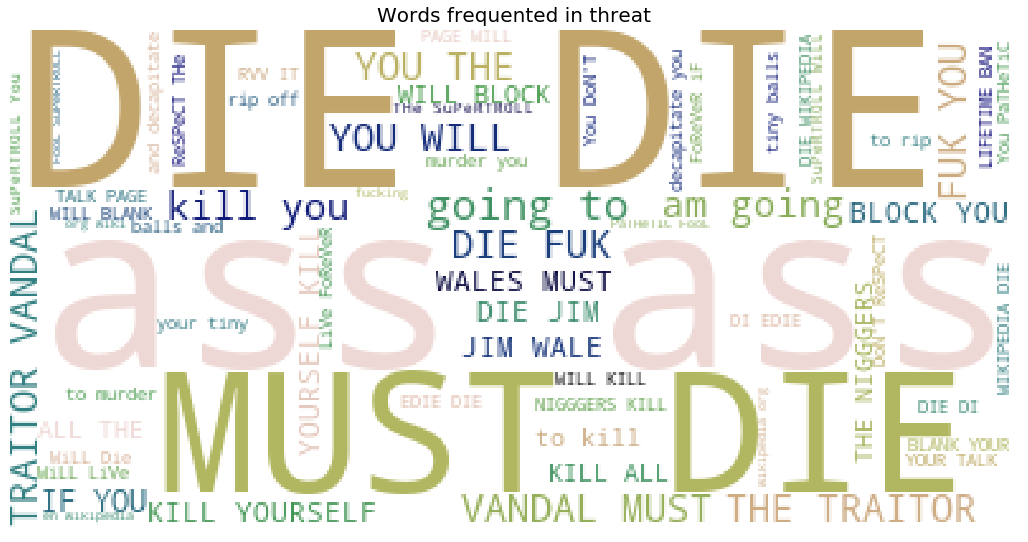

In [92]:
wordcloud(data, 'threat')

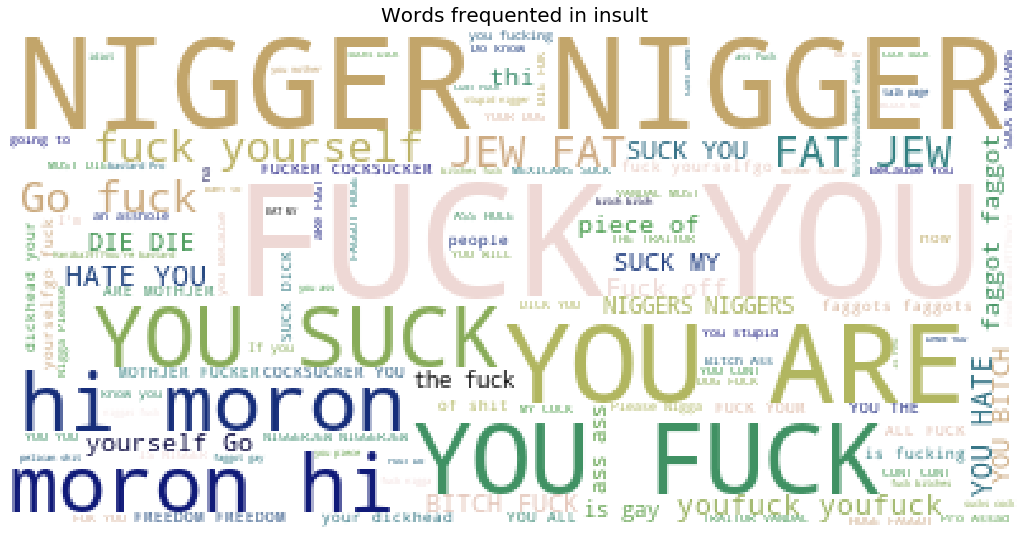

In [93]:
wordcloud(data, 'insult')

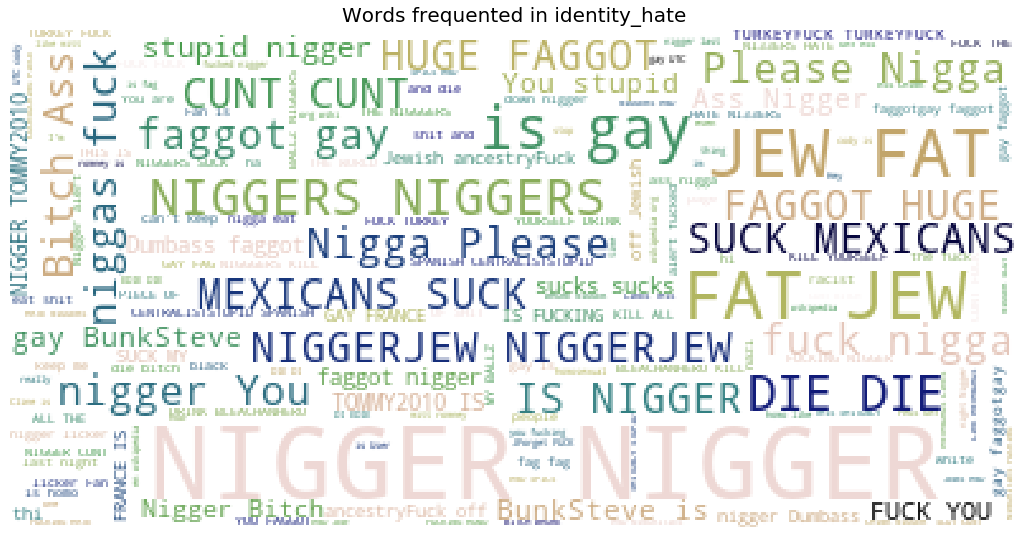

In [94]:
wordcloud(data, 'identity_hate')

**Normalize Data**

+ show distributions

# Feature Engineering

The *created_date* label tells us on what date at what time the comments have been posted. 
The date and time data are stored in string format. To be able to work with the data we have to split the time and date and convert them into their respective formats.

In [105]:
data1.created_date

0          2015-09-29 10:50:41.987077+00
1          2015-09-29 10:50:42.870083+00
2          2015-09-29 10:50:45.222647+00
3          2015-09-29 10:50:47.601894+00
4          2015-09-29 10:50:48.488476+00
5          2015-09-29 10:50:50.865549+00
6          2015-09-29 10:50:52.451277+00
7          2015-09-29 10:50:54.055221+00
8          2016-01-13 18:01:05.156229+00
9          2016-01-13 18:11:21.570460+00
10         2016-01-13 18:33:56.298783+00
11         2016-01-13 18:43:00.710664+00
12         2016-01-13 18:57:24.023698+00
13         2016-01-13 19:02:22.655293+00
14         2016-01-13 19:04:31.238894+00
15         2016-01-13 19:12:25.561335+00
16         2016-01-13 19:25:28.280515+00
17         2016-01-13 19:39:16.688592+00
18         2016-01-13 19:42:06.626287+00
19         2016-01-13 19:48:45.619202+00
20         2016-01-13 19:56:52.277231+00
21         2016-01-13 20:05:44.464941+00
22         2016-01-13 20:09:13.217201+00
23         2016-01-13 20:12:35.937728+00
24         2016-